In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
data=pd.read_csv("C:/Users/ROOPA DEEPA/OneDrive/Desktop/DEEPA PATIL/ML035/dataset.csv")

In [6]:
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.index

RangeIndex(start=0, stop=768, step=1)

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


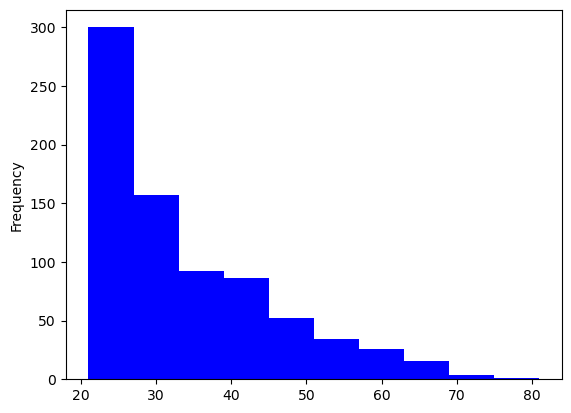

In [29]:
data.Age.plot(color="blue",kind="hist")
plt.show()

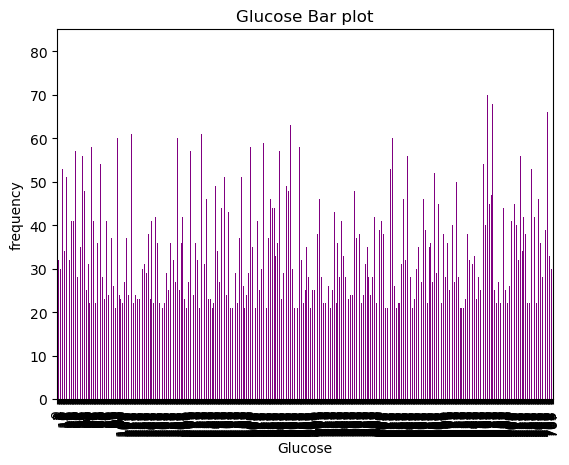

In [30]:
data.Age.plot(color="purple",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

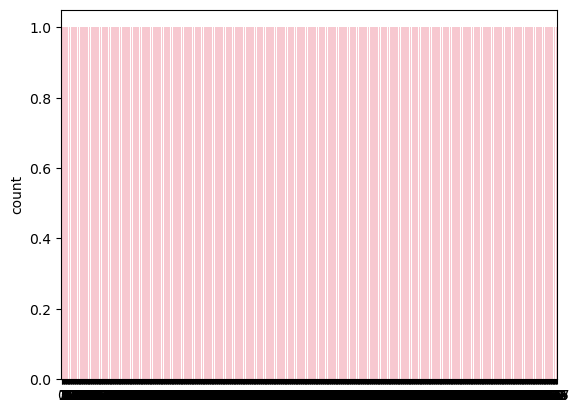

In [32]:
sns.countplot(data=data["Glucose"],color="pink")
plt.show()

In [15]:
data.Pregnancies.value_counts()


Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

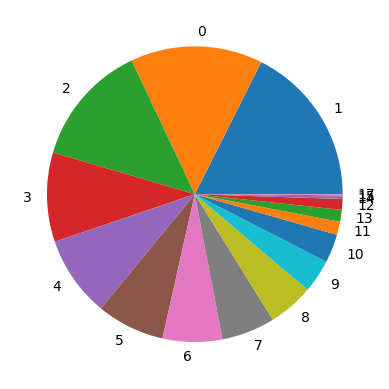

In [15]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
plt.pie(sizes,data=data,labels=labels)
plt.show()

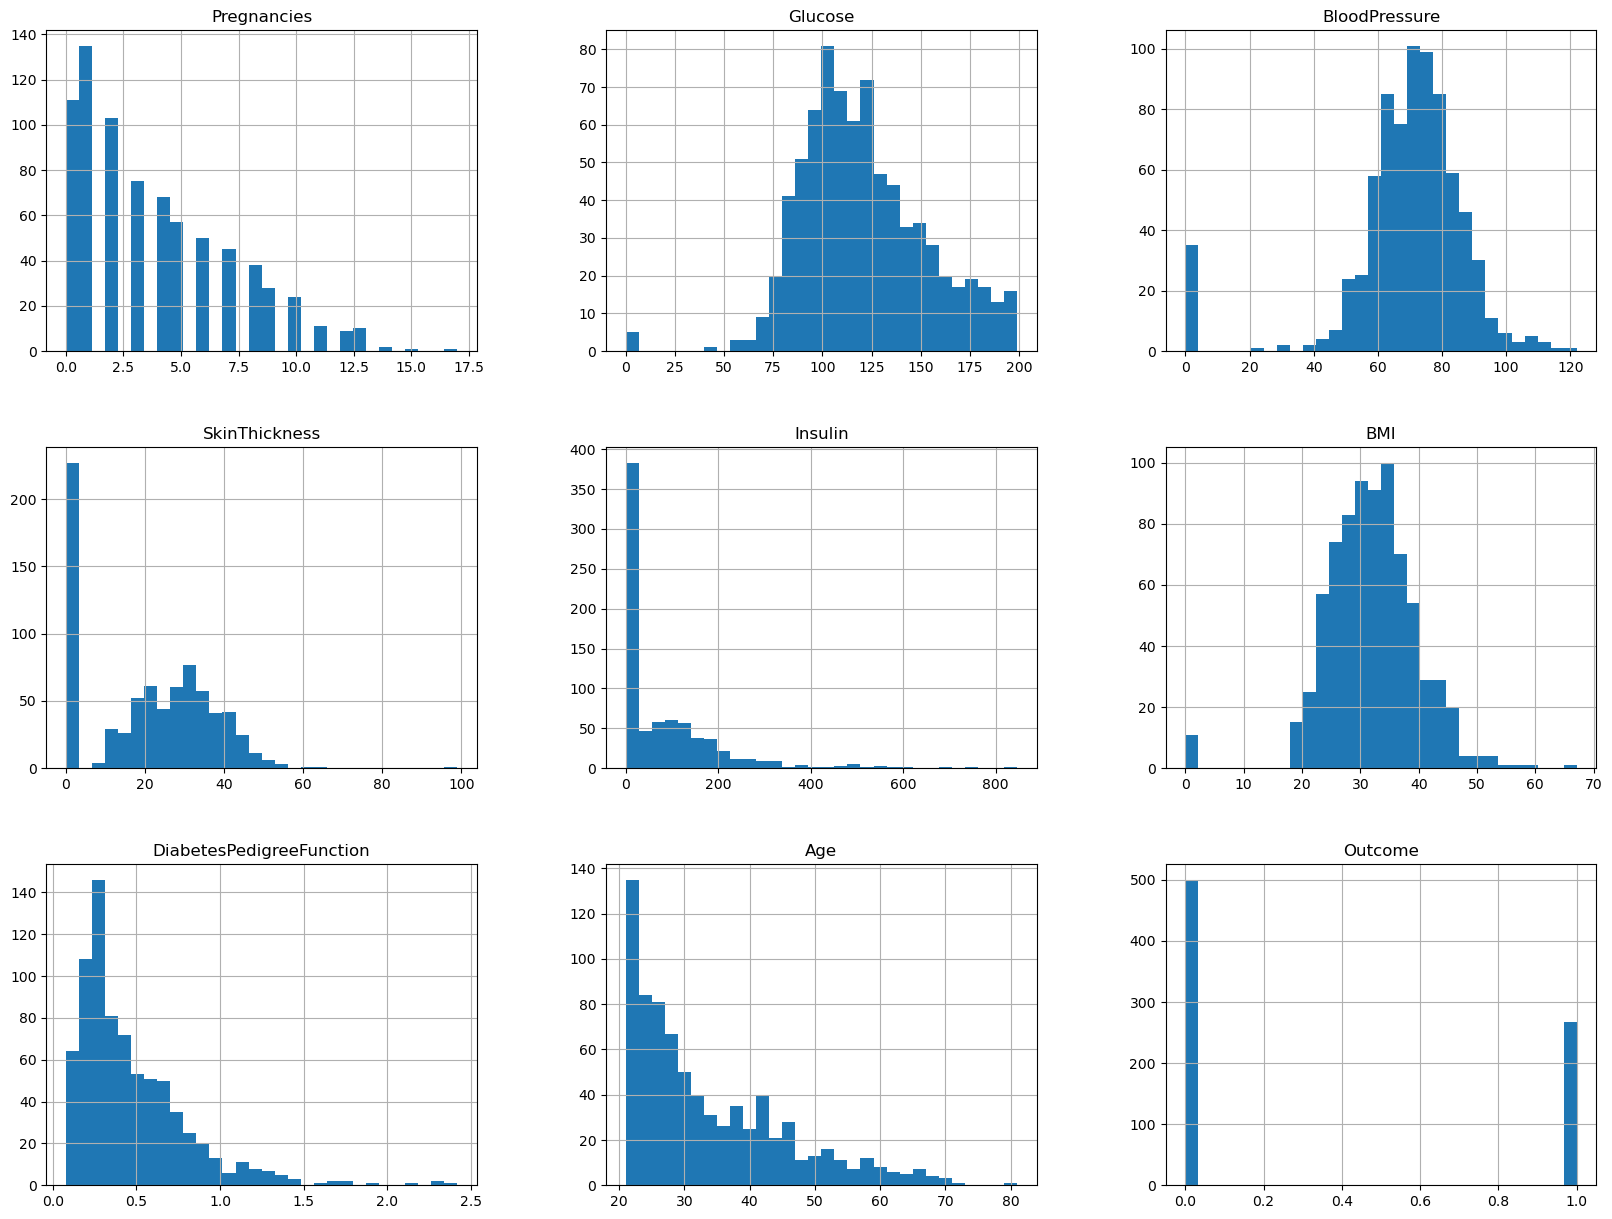

In [16]:
data.hist(bins=30, figsize=(20,15)) 
plt.show()

In [33]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)    # Create, random train and test set


train_df_labels = train_df["Outcome"].copy()                                  # Drop labels
train_df= train_df.drop("Outcome", axis=1) 

In [20]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler                       # This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

SGDClassifier(random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.72727273, 0.67391304, 0.69130435])

In [23]:
prediction = sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.6497829232995659


In [24]:
model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.77922078, 0.77391304, 0.72173913])

In [26]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.7756874095513748


Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Confusion Matrix:
[[72 27]
 [16 39]]
Feature Importances:
[0.08322908 0.25010794 0.09115253 0.10925359 0.10409872 0.13605855
 0.08883676 0.13726284]


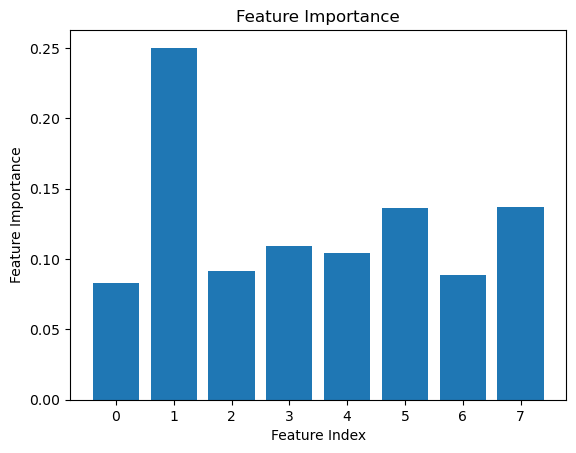

In [17]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the feature columns (X) and target column (y)
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = xgb_model.feature_importances_
print("Feature Importances:")
print(feature_importances)

# Plot the feature importance
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()


In [27]:
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
]) 

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [28]:
print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, train_df_labels))

SVM Accuracy of Classifier:  0.8451519536903039


In [29]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_labels, y_train_pred)

array([[375,  75],
       [109, 132]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.6376811594202898
Recall Score: 0.5477178423236515
F1 Score: 0.5892857142857143


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_df_labels, y_train_pred)

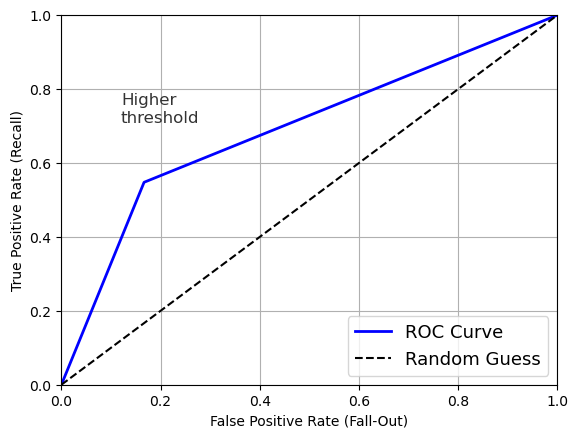

In [34]:
import matplotlib.pyplot as plt

# Plot the ROC Curve
plt.plot(fpr, tpr, color='blue', linewidth=2, label='ROC Curve')

# Plot the baseline (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

# Add annotation
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333", fontsize=12)

# Axis labels
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')

# Set axis limits and grid
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)

# Add legend
plt.legend(loc="lower right", fontsize=13)

# Display the plot
plt.show()


In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared, train_df_labels)

y_probas_forest = cross_val_predict(forest_clf, train_prepared, train_df_labels, cv= 3, method = "predict_proba")

In [41]:
prediction = forest_clf.predict(train_prepared)
print("Random Forest Classifire Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

Random Forest Classifire Accuracy of Classifier:  0.7756874095513748


In [42]:
cross_val_score(forest_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.78787879, 0.79565217, 0.73043478])

In [43]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_df_labels, y_scores_forest)

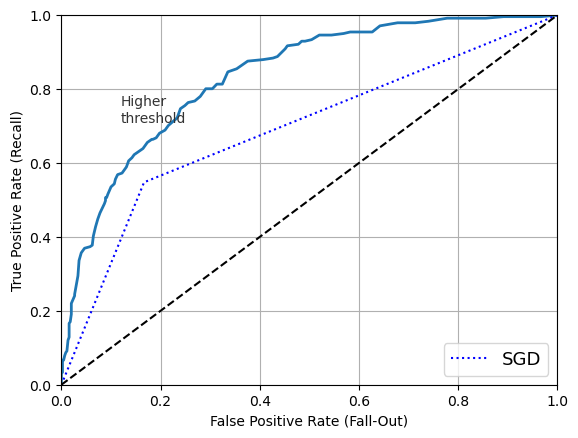

In [44]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()


In [45]:
roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924